                fred  ralph  jeff  jake  brian
items                                         
Banana             1      0     0     0      0
Coffee             2      0     1     0      1
Energy Drink       1      0     0     1      0
Cup Cakes          0      1     0     0      0
Cigarettes         0      1     0     0      0
Wine               0      1     0     0      0
Lighter            0      1     1     0      0
Fountain Drink     0      0     1     0      0
Gum                0      0     1     0      0
Propane            0      0     1     0      0
Candy Bar          0      0     0     1      0
Toy Robot          0      0     0     0      1
[[0.         3.16227766 2.64575131 2.44948974 2.        ]
 [3.16227766 0.         2.64575131 2.44948974 2.44948974]
 [2.64575131 2.64575131 0.         2.64575131 2.23606798]
 [2.44948974 2.44948974 2.64575131 0.         2.        ]
 [2.         2.44948974 2.23606798 2.         0.        ]]
Likeness Table:
           fred     ralph      jeff

<AxesSubplot:>

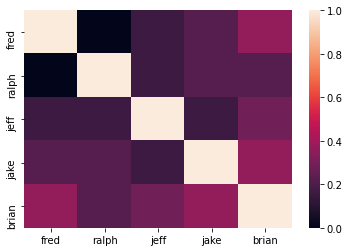

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

def knn(list_of_shoppers_names_string):
    dict_of_shoppers={}
    list_of_items=[]
    shoppers_encoding={}
    for shopper in list_of_shoppers_names_string:
        dict_of_shoppers[shopper]=eval(shopper)
        
    shop_carts=dict_of_shoppers.values()
    [list_of_items.extend(x) for x in shop_carts]
    list_of_items_unique=[]
    [list_of_items_unique.append(x) for x in list_of_items if x not in list_of_items_unique ]
    
    ### Encoding shopping cart items by count of item in cart for each shopper ##
    for shopper in list_of_shoppers_names_string:
        shoppers_encoding[shopper]=[eval(shopper).count(item) for item in list_of_items_unique]
    shoppers_encoding['items']=list_of_items_unique
    
    ### Make Dataframe encoded by item ###
    df=pd.DataFrame(shoppers_encoding)
    df.set_index('items',inplace=True)
    print(df)
    
    ### Show Euclidian Distances by creating a confusion matrix ###
    n_shoppers=len(list_of_shoppers_names_string)
    n_items=len(list_of_items_unique)
    euc=np.empty(n_shoppers*n_shoppers).reshape(n_shoppers,n_shoppers)         # Create 2-D array of length of shoppers
    for i in range(0,n_shoppers):           # Fill array with euclidian distance between each shopper
        for j in range(0,n_shoppers):
            eucsumsq=0
            for k in range(0,n_items):  
                eucsumsq=eucsumsq+(df.iloc[k,i]-df.iloc[k,j])**2 # Euclidian distance=sumsq of distance for each item
            euc[i][j]=eucsumsq**0.5
    print(euc)
    
    ### Convert Distance Matrix into Ratio Matrix ###
    euc_ratio=euc/euc.max()
    
    ### Convert Ratio Matrix into Likeness Matrix ###
    euc_likeness=1-euc_ratio
    
    ### Convert Likeness Matrix into Dataframe ###
    df_likeness=pd.DataFrame(euc_likeness,columns=list_of_shoppers_names_string)
    df_likeness.index=list_of_shoppers_names_string
    
    
    return df_likeness
    
#### List of items for each individual ####
fred = ['Banana', 'Coffee', 'Coffee', 'Energy Drink'] 
ralph = ['Cup Cakes', 'Cigarettes', 'Wine', 'Lighter'] 
jeff = ['Coffee', 'Fountain Drink', 'Gum', 'Lighter', 'Propane'] 
jake = ['Candy Bar', 'Energy Drink'] 
brian = ['Coffee', 'Toy Robot']

#### Call function to return dataframe of likeness ####
df=knn(['fred','ralph','jeff','jake','brian'])
print('Likeness Table:')
print(df)

#### Plot Heatmap ####
sns.heatmap(df)